
# Sect 18 Pt3-19 Central Limit Theorem

- online-ds-pt-100719
- 01/17/20


# Questions

- CLT clarification

# Topics / Question

- Normal distribution
- Standard Normal Distribution
- Z-tests with Normal Distribution
- Sampling
- Central Limit Theorem

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.6.5 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


# Normal Distribution

> **The Normal Distribution is symmetrical and its mean, median and mode are equal.** 
* area under curve is equal to 1.0
* denser in the center and less dense in the tails
* defined by two parameters, the mean ($\mu$) and the standard deviation ($\sigma$).
    

<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-normal-distribution-online-ds-ft-100719/master/images/normal_sd_new.png" width=600></center>


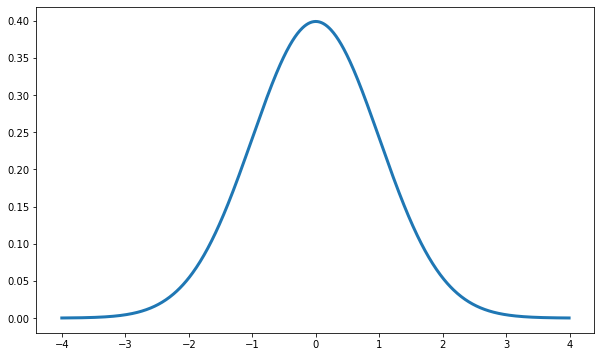

In [2]:
import scipy.stats as stats
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

fig,ax = plt.subplots(figsize=(10,6),nrows=1)

ax.plot(x,y,zorder=-1,lw=3)

[(0, 1.0499637279578975), (-4.0, 3.9899999999998297)]

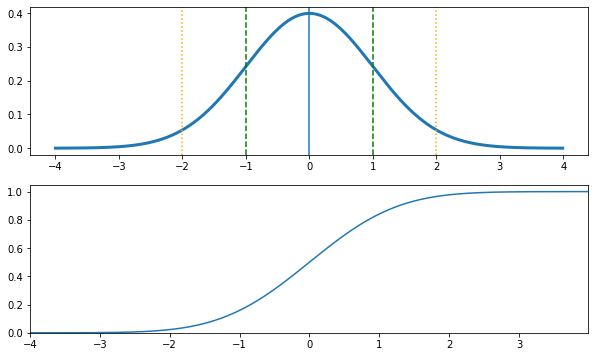

In [5]:

fig,axes = plt.subplots(figsize=(10,6),nrows=2)


ax =axes[0]
ax.plot(x,y,zorder=-1,lw=3)
# stats.norm.cdf(4)
ax.axvline(0)

ax.axvline(-1,ls='--',c='green')
ax.axvline(1,ls='--',c='green')

ax.axvline(-2,ls=':',c='orange')
ax.axvline(2,ls=':',c='orange')


ax=axes[1]
ax.plot(x, stats.norm.cdf(x))


ax.set(ylim=0,xlim=(x[0],x[-1]))
# fig

In [7]:
## Prove percentage rules - 
print(round(stats.norm.cdf(1) - stats.norm.cdf(-1),3))
round(stats.norm.cdf(2) - stats.norm.cdf(-2),3)

0.683


0.954

In [16]:
stats.norm.cdf([1,2])

array([0.84134475, 0.97724987])

## Standardized Normal Distribution

- Special case of the normal distribution where $\mu=0$ and $\sigma=1$

In [8]:
dfh = fs.datasets.load_height_weight()
dfh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Z-Scores

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23e4f9b0>,
      dtype=object)

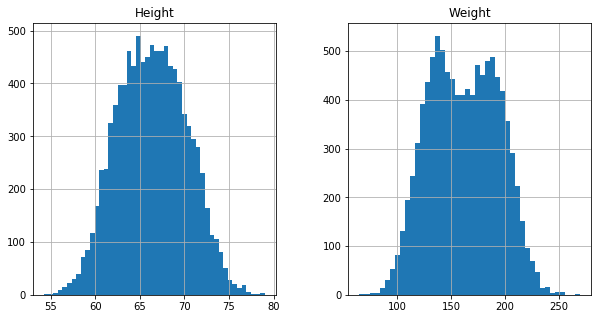

In [10]:
dfh.hist(bins='auto',figsize=(10,5))

#### Z-score

The standard score (more commonly referred to as a $z$-score) is a very useful statistic because it allows us to:
1. Calculate the probability of a certain score occurring within a given normal distribution and 
2. Compare two scores that are from different normal distributions.

Any normal distribution can be converted to a standard normal distribution and vice versa using this
equation:

$$\Large z=\frac{x-\mu}{\sigma}$$

- where $x$ is an individual data point
- $\mu$ is the mean
- $\sigma$ is the standard deviation

In [12]:
dfh['HeightZ'] = (dfh["Height"] - dfh['Height'].mean())/ dfh['Height'].std()
dfh['WeightZ'] = (dfh["Weight"] - dfh['Weight'].mean()) /dfh['Weight'].std()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25ab3ba8>,
      dtype=object)

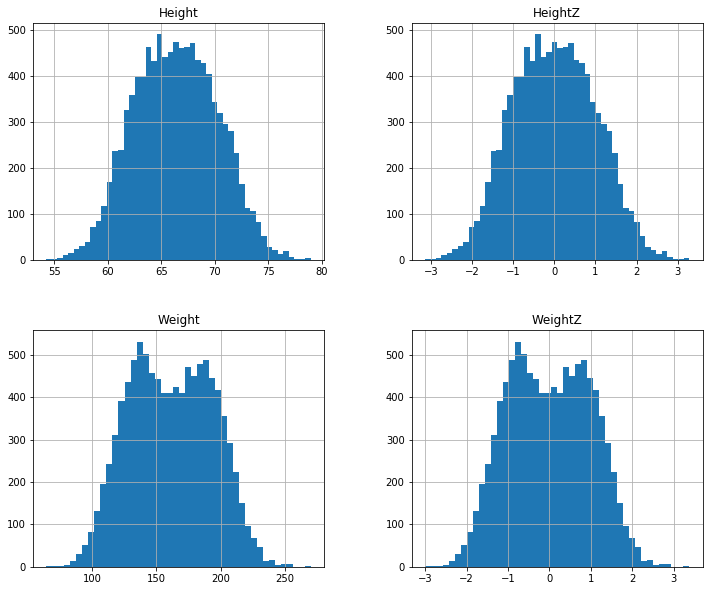

In [14]:
dfh.hist(figsize=(12,10),bins='auto')

## Z-Scoring does not affect the data distribution, just standardizes units

# Statistical Testing with Z-scores and p-values

- Once data is standardized, can start answering questions about population membership usint $Z$-Tests

### Population vs Sample
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/sample.png" width=40%>


>A **population** is the collection of **all the items of interest in a study**. The numbers you obtain when using a population are called **parameters**.

> A **sample** is a **subset of the population**. The numbers you obtain when working with a sample are called **statistics**.



## What Are Hypotheses ?

- Null Hypothesis: $H_0$ there is no relationship / the samples come from the same population.

- Alternative: $H_A$/$H_1$ there is a relationship / the samples DO NOT come from same distribution


 ### $\large \alpha$= 0.05


- What does it mean?
    - cutoff for judging whether our sample is "significantly" different than the population.
    - % chance that you would observe this sample from your population dataset





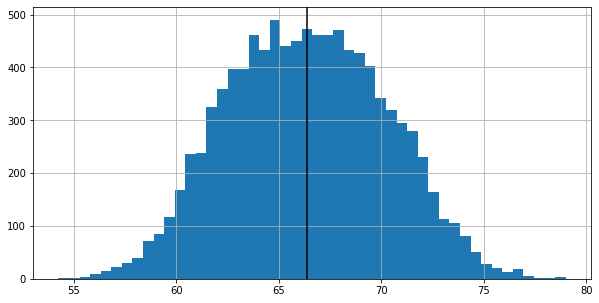

In [27]:
ax = dfh['Height'].hist(bins='auto',figsize=(10,5))
meanH = dfh['Height'].mean()
stdH = dfh["Height"].std()

ax.axvline(meanH,c='k')
fig =ax.get_figure()

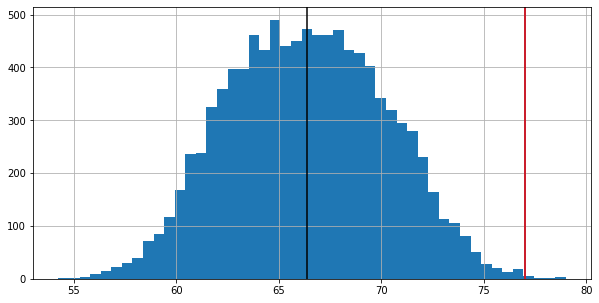

In [24]:
potential_alien_lifeform = 77#height
ax.axvline(potential_alien_lifeform,color='red')
fig

H0 =  The lifeform's height comes from the human population. 

H1 = The lifesform's height is significantly different than humans. (its from another population).

In [28]:
dfh['HeightZ'] = (dfh["Height"] - dfh['Height'].mean())/ dfh['Height'].std()
z_alien = (potential_alien_lifeform - meanH) /stdH
z_alien

2.7634470526084107

In [29]:
alpha=0.05
1 - stats.norm.cdf(z_alien)

0.0028597185423705485

### One-Sample $z$-test

> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->



| Set     | $H_0   $    | $H_a$ | Tails |
|---------|-------|-------|-------|
|<img width=30/>|<img width=100/>|<img width=100/>|<img width=50/>|
| 1  | $\mu= M $ |$\mu \neq M $ | 2  | 
| 2  | $\mu \geq M $ |$\mu < M $ | 1  | 
| 3  | $\mu \leq M $ |$\mu > M $ | 1  | 



<!---For $z$-tests, a $z$-statistic is used as our test statistic. You'll see other test statistics suitable for other tests later. A one-sample $z$-statistic is calculated as:

$$ \large \text{z-statistic} = \dfrac{\bar x - \mu_0}{{\sigma}/{\sqrt{n}}} $$

This formula slightly differs from the standard score formula. It includes the square root of $n$ to reflect that we are dealing with the sample variance here. 

Now, all you need to do is use this formula given your sample mean $\bar x$, the population standard deviation $\sigma$, and the number of items in the sample ($n$). $\mu_0$ is the mean you're testing the hypothesis for, or the "hypothesized mean". --->


# Central Limit Theorem

The Central Limit Theorem states: 

- No matter what populations distribtuon shape, the means of samples from the population will form a normal distribution.




***The key takeaway from the central limit theorem is that it allows different distributions to be processed as a normal distribution, even when they do not fulfill the normality requirements shown above. We'll discuss this further when we talk about hypothesis testing.***

[Here is an interesting youtube video highlighting this phenomenon](https://www.youtube.com/watch?v=AUSKTk9ENzg) for now. We will consider this in detail later. 

# Titanic
- Compare survivors vs non-survivors ages

In [ ]:
# !pip install -U fsds_100719
# from fsds_100719.imports import *

In [30]:
dft = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
# convert column names to lowercase
# dft.columns = [col.lower() for col in dft.columns ]
dft['sex_code'] = (dft['Sex']=='female').astype('int')
dft.drop('Cabin', axis=1,inplace=True)
dft.dropna(inplace=True)
dft.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


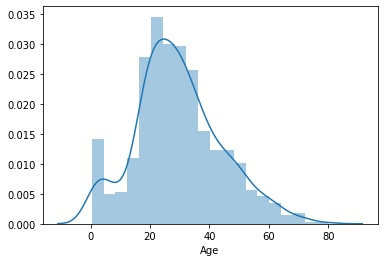

In [31]:
sns.distplot(dft['Age'])

In [32]:
import scipy.stats as stats
def test_for_normality(x,alpha=.05):
    
    stat, p = stats.normaltest(x)
    print(f"Sample has {len(x)} observations. ")
    print(f"Normaltest p-value = {p}")
    
    if p <alpha:
        print("[!] The sample is NOT normal.")
    else:
        print("[i] The sample IS normal.")
    

In [33]:
test_for_normality(dft['Age'])

Sample has 712 observations. 
Normaltest p-value = 0.00011567916063448067
[!] The sample is NOT normal.


## Demonstrating How Taking Many Samples Creates a Normal Distribution of Means

Sample has 100 observations. 
Normaltest p-value = 0.907274628989178
[i] The sample IS normal.


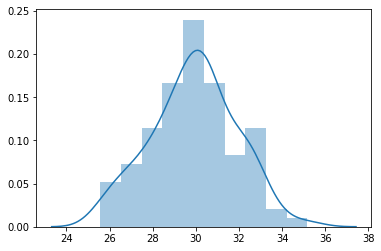

In [36]:

df = dft['Age'].copy()
samples = [] 
for i in range(100):
    
    samples.append(df.sample(50).mean())

sns.distplot(samples)
test_for_normality(samples)

Sample has 10 observations. 
Normaltest p-value = 0.8520040297267016
[i] The sample IS normal.


//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


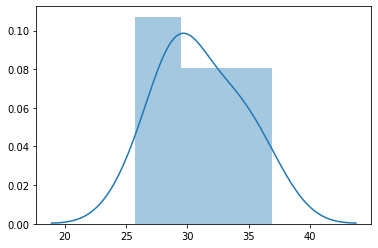

In [37]:

samples = [] 
for i in range(10):
    
    samples.append(df.sample(20).mean())

sns.distplot(samples)
test_for_normality(samples)

## Test if Ages are sig. different between survivors and non-survivors

In [38]:
dft.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [46]:
df_lived = dft.groupby('Survived').get_group(1)['Age'].rename('Lived')
df_died = dft.groupby('Survived').get_group(0)['Age'].rename('Died')

grps= dft.groupby('Survived').groups
grps

{0: Int64Index([  0,   4,   6,   7,  12,  13,  14,  16,  18,  20,
             ...
             873, 876, 877, 881, 882, 883, 884, 885, 886, 890],
            dtype='int64', length=424),
 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  21,  22,
             ...
             865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
            dtype='int64', length=288)}

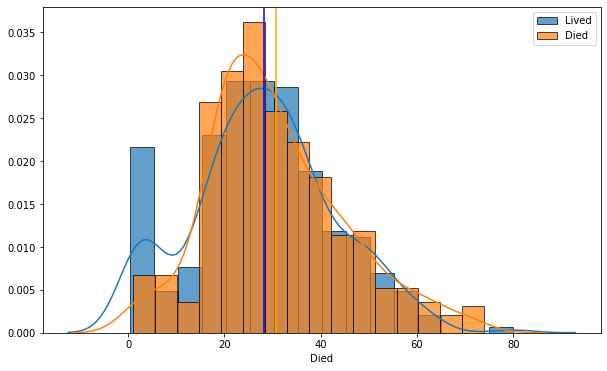

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_lived,ax=ax,label='Lived',hist_kws=dict(edgecolor='k',alpha=0.7))
sns.distplot(df_died,ax=ax,label='Died',hist_kws=dict(edgecolor='k',alpha=0.7))

ax.axvline(df_lived.mean(),color='blue')
ax.axvline(df_died.mean(),color='orange')
ax.legend()

In [55]:
fs.ds.inspect_variables(locals())

,type,size
variable,,
dfh,DataFrame,940152
dft,DataFrame,309472
df,Series,11416
df_died,Series,6808
x,ndarray,6496
y,ndarray,6496
df_lived,Series,4632
grps,dict,240
samples,list,192


#[i] set `print_names=True` for var names to copy/paste.
---------------------------------------------


In [56]:
test_for_normality(df_lived)
test_for_normality(df_died)

Sample has 288 observations. 
Normaltest p-value = 0.4744594536940786
[i] The sample IS normal.
Sample has 424 observations. 
Normaltest p-value = 9.786307175880915e-06
[!] The sample is NOT normal.


In [60]:
stats.t.cdf()

TypeError: '>' not supported between instances of 'str' and 'int'